#**Titanic - Machine Learning from Disaster**
This notebook demonstrates how to predict the survival of passengers on the Titanic using machine learning. We'll walk through the process of loading the data, performing exploratory data analysis, building a predictive model, and visualizing the results.

**1. Importing Necessary Libraries and Loading Data**

We begin by importing the necessary libraries and loading the datasets.
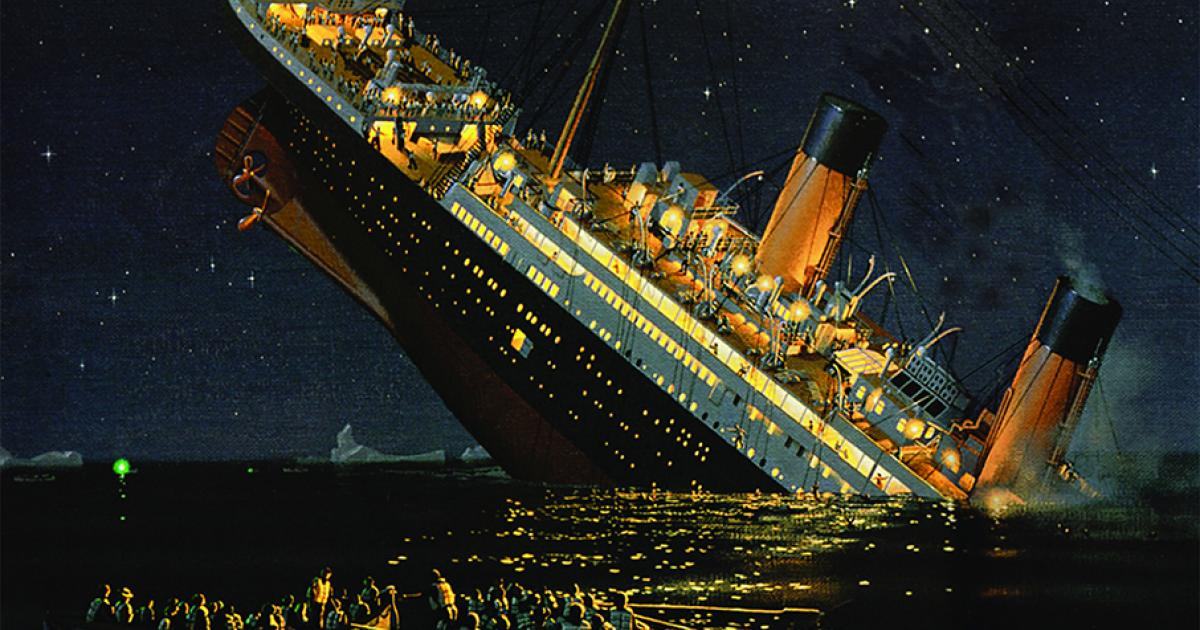

# **Understanding the data**

*   **Training Set (train.csv):** Contains features and labels (whether passengers survived or not).

*   **Test Set (test.csv):** Contains features only, and you need to predict the labels.

*   **Gender Submission (gender_submission.csv):** An example prediction file assuming all females survive.
  



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import os


# load dataset
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
y_test = pd.read_csv("/content/gender_submission.csv")


# Displaying the first few rows of the train dataset
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [28]:
y_test.shape

(418, 2)


#**Survive or not = ?**
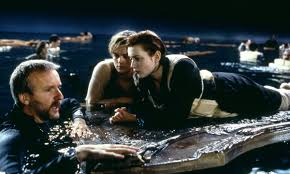

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
train.shape

(891, 12)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
test.shape

(418, 11)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**2. Exploratory Data Analysis (EDA)**

Let's start by exploring the survival rate by gender. This will give us a quick insight into how gender may have influenced survival chances.
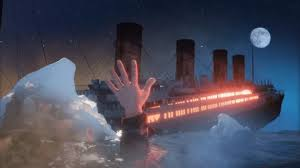

#**Remove Nulls from Columns**

In [37]:
train.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [38]:
# prompt: how percent nulls in columns

(train.isnull().sum()/train.shape[0]*100).sort_values(ascending=False)

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [39]:
test.isnull().sum().sort_values(ascending=False)

,0
Cabin,327
Age,86
Fare,1
Name,0
Pclass,0
PassengerId,0
Sex,0
Parch,0
SibSp,0
Ticket,0


In [40]:
(train.isnull().sum()/train.shape[0]*100).sort_values(ascending=False)

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [41]:
# remove duplicates from columns

train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [42]:
# Analyzing survival rates by gender
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in train.columns:
  if train[col].dtype=='object':
    train[col]=le.fit_transform(train[col])

In [44]:
for col in test.columns:
  if test[col].dtype=='object':
    test[col]=le.fit_transform(test[col])

#**Visualization of Survival Rate by Gender**

We'll create a bar plot to visualize the survival rate based on gender. This will help us understand the disparity between male and female survival rates.

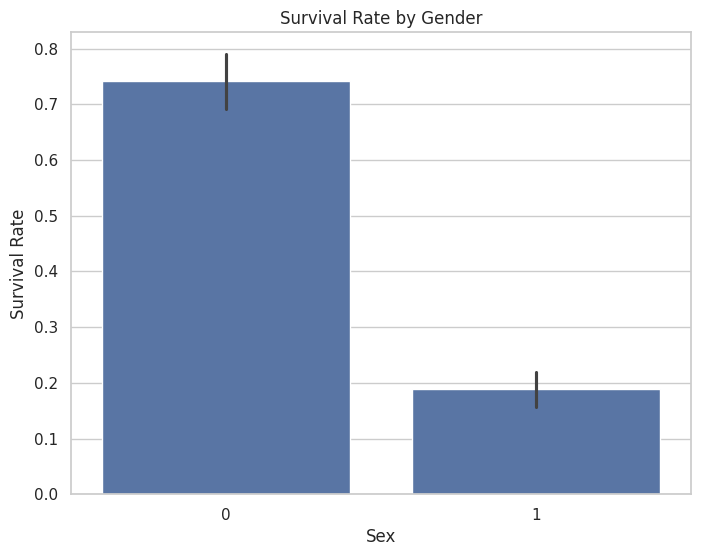

In [45]:
# visualization
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

#**3. Feature Selection and Model Training**
Next, we select the key features (Pclass, Sex, SibSp, Parch) for our model. We'll convert categorical variables into numerical ones and train a RandomForestClassifier to predict survival.

In [46]:
# Feature selection and preprocessing
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

# Initializin and training the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
y = train["Survived"]
model.fit(X, y)
predictions = model.predict(X_test)


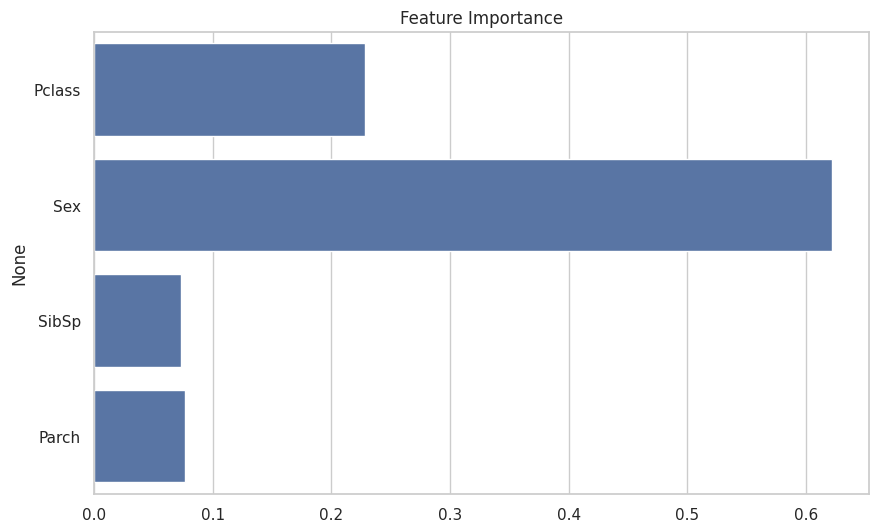

In [47]:
# visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()

#**Data Display**

<Axes: >

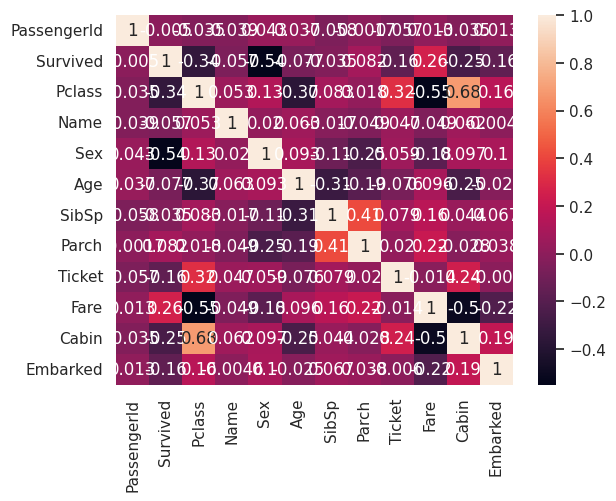

In [48]:
import seaborn as sns
sns.heatmap(train.corr(),annot=True)

<Axes: >

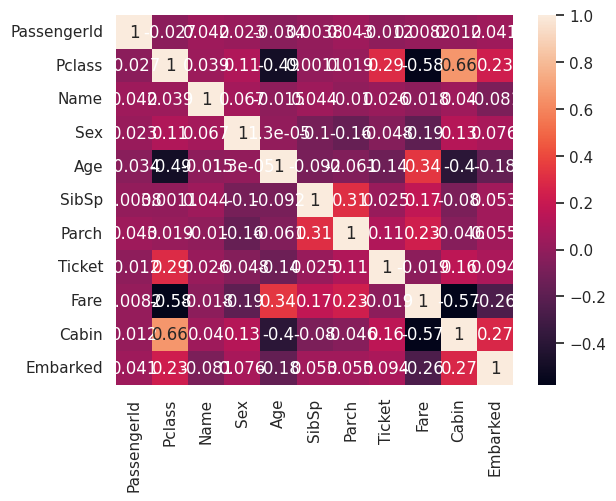

In [49]:
sns.heatmap(test.corr(),annot=True)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Name'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Ticket'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Cabin'}>,
        <Axes: title={'center': 'Embarked'}>]], dtype=object)

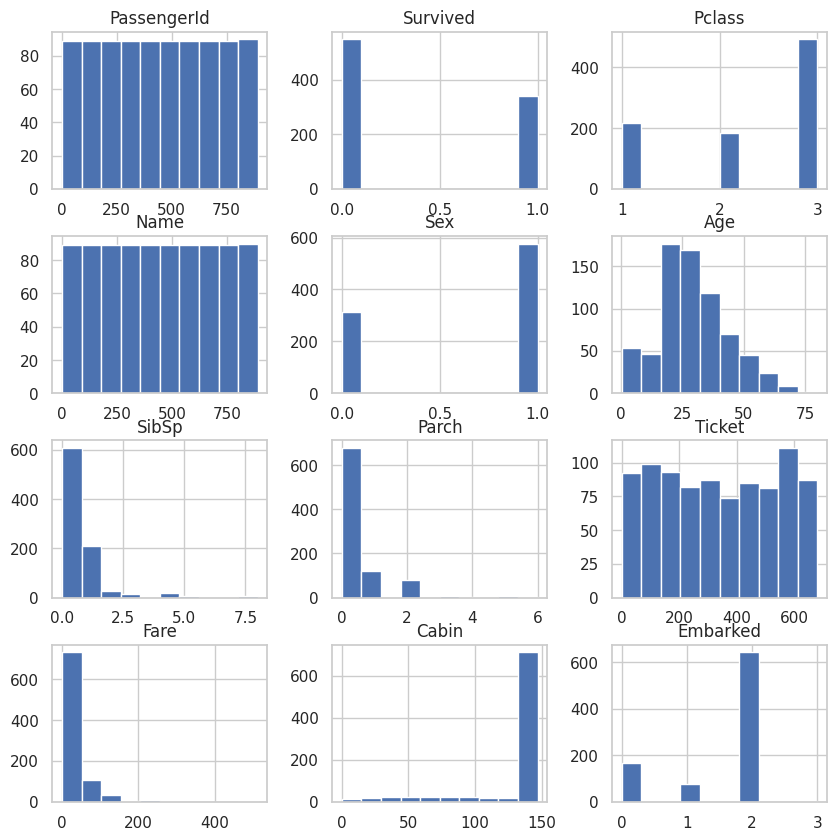

In [50]:
train.hist(figsize=(10,10))

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Name'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Ticket'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Cabin'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

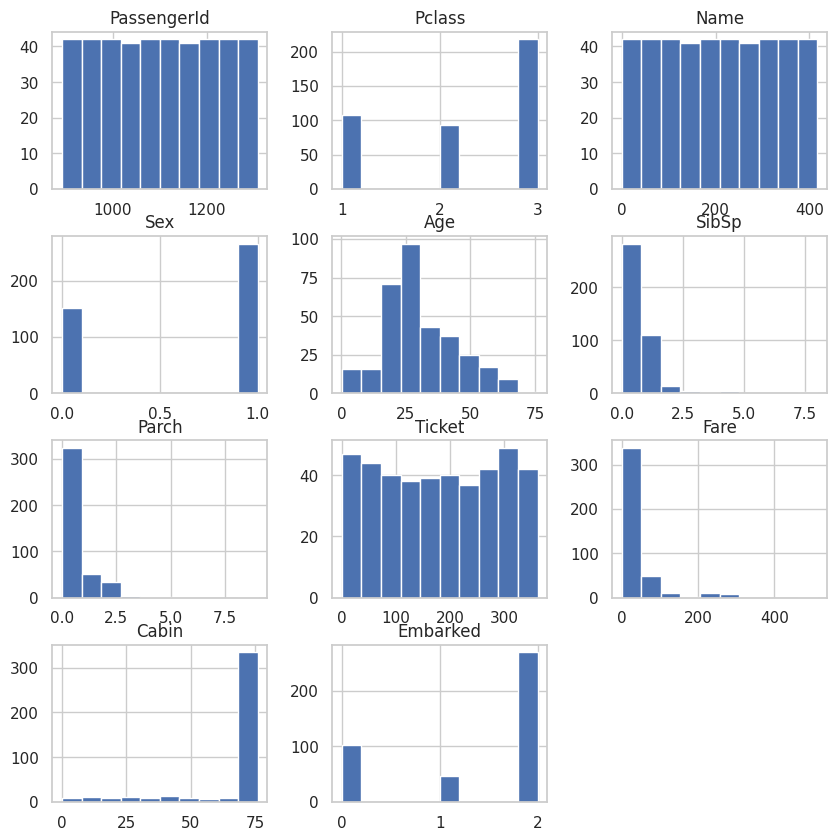

In [51]:
test.hist(figsize=(10,10))

#**Splitting data**

In [52]:
train.shape , test.shape

((891, 12), (418, 11))

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [54]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,76,1
1,893,3,403,0,47.0,1,0,221,7.0000,76,2
2,894,2,269,1,62.0,0,0,73,9.6875,76,1
3,895,3,408,1,27.0,0,0,147,8.6625,76,2
4,896,3,178,0,22.0,1,1,138,12.2875,76,2


In [55]:
test.shape,y_test.shape

((418, 11), (418, 2))

In [56]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
x_test = test.iloc[:,:]
y_test = y_test.iloc[:,:]

In [57]:
x_test.shape , y_test.shape

((418, 11), (418, 2))

#**Try models on data**

In [58]:
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Assuming you have your features and labels in X and y
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

Models = {
    'LogisticRegression' :LogisticRegression(),
 'DecisionTreeClassifier' : DecisionTreeClassifier(),
 'RandomForestClassifier' : RandomForestClassifier(),
 'GaussianNB':GaussianNB(),
 'KNeighborsClassifier':KNeighborsClassifier()
}

ModelName = []
ModelAccuracy = []
for nameModel,model in tqdm(Models.items()):
    model.fit(x_train,y_train)
    ModelName.append(nameModel)

    # Predict on the test set
    y_pred = model.predict(x_test)

    ModelAccuracy.append(accuracy_score(y_test,y_pred))
    print(nameModel,accuracy_score(y_test,y_pred))
    print(nameModel,precision_score(y_test,y_pred))
    print(nameModel,recall_score(y_test,y_pred))
    print(nameModel,f1_score(y_test,y_pred))

 60%|██████    | 3/5 [00:00<00:00, 15.73it/s]

LogisticRegression 0.7932960893854749
LogisticRegression 0.7761194029850746
LogisticRegression 0.7027027027027027
LogisticRegression 0.7375886524822697
DecisionTreeClassifier 0.7821229050279329
DecisionTreeClassifier 0.7868852459016393
DecisionTreeClassifier 0.6486486486486487
DecisionTreeClassifier 0.711111111111111
RandomForestClassifier 0.7821229050279329
RandomForestClassifier 0.7868852459016393
RandomForestClassifier 0.6486486486486487
RandomForestClassifier 0.711111111111111
GaussianNB 0.776536312849162
GaussianNB 0.6808510638297872
GaussianNB 0.8648648648648649
GaussianNB 0.7619047619047619


100%|██████████| 5/5 [00:00<00:00, 20.68it/s]

KNeighborsClassifier 0.7877094972067039
KNeighborsClassifier 0.78125
KNeighborsClassifier 0.6756756756756757
KNeighborsClassifier 0.7246376811594203


In [59]:
# accuracy
Model_accuracy = pd.DataFrame({'Model':ModelName,'Scores':ModelAccuracy})
Model_accuracy

,Model,Scores
0,LogisticRegression,0.793296
1,DecisionTreeClassifier,0.782123
2,RandomForestClassifier,0.782123
3,GaussianNB,0.776536
4,KNeighborsClassifier,0.787709


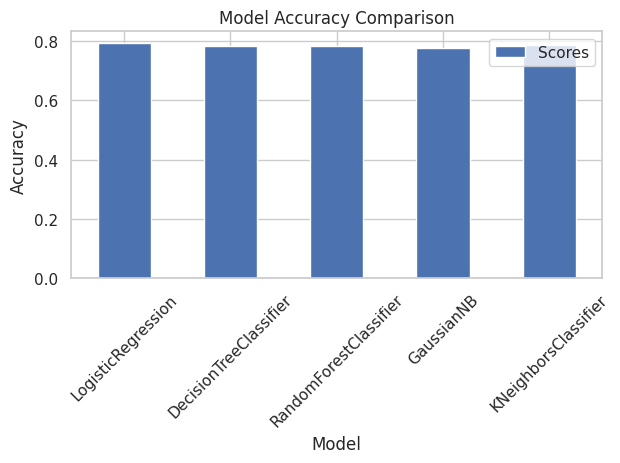

In [60]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called Model_accuracy with columns 'Model' and 'Scores'
Model_accuracy.plot(x='Model',y='Scores',kind='bar')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()  # adjust layout to fit labels

# display the plot
plt.show()

In [62]:
predictions = model.predict(x_test)
predicted_labels = (predictions > 0.5).astype(int)

# Calculate the length of the 'Survived' column
num_predictions = len(predicted_labels)
submission = pd.DataFrame({
    'PassengerId': range(892, 892 + num_predictions),  # Dynamically adjust PassengerId range
    'Survived': predicted_labels.flatten()
})

submission.to_csv('submission.csv', index=False)

In [63]:
pd.read_csv('/content/submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
174,1066,0
175,1067,0
176,1068,0
177,1069,1
